# Bit-Coin Price Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df = pd.read_csv("./BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [4]:
# shape of the dataset
df.shape

(2713, 7)

In [5]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [6]:
# summary of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### Exploratory Data Analysis

Text(0, 0.5, 'Price in dollar')

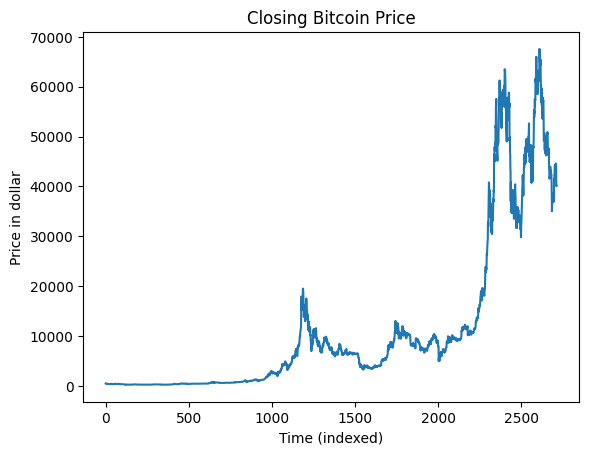

In [7]:
# plot closing stock price
plt.plot(df["Close"])
plt.title("Closing Bitcoin Price")
plt.xlabel("Time (indexed)")
plt.ylabel("Price in dollar")

In [8]:
# similarity of "Close" and Adj "Close" Columns
df[df["Adj Close"] == df["Close"]].shape

(2713, 7)

In [9]:
# deleting the "Adj Close" columns
df = df.drop("Adj Close", axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


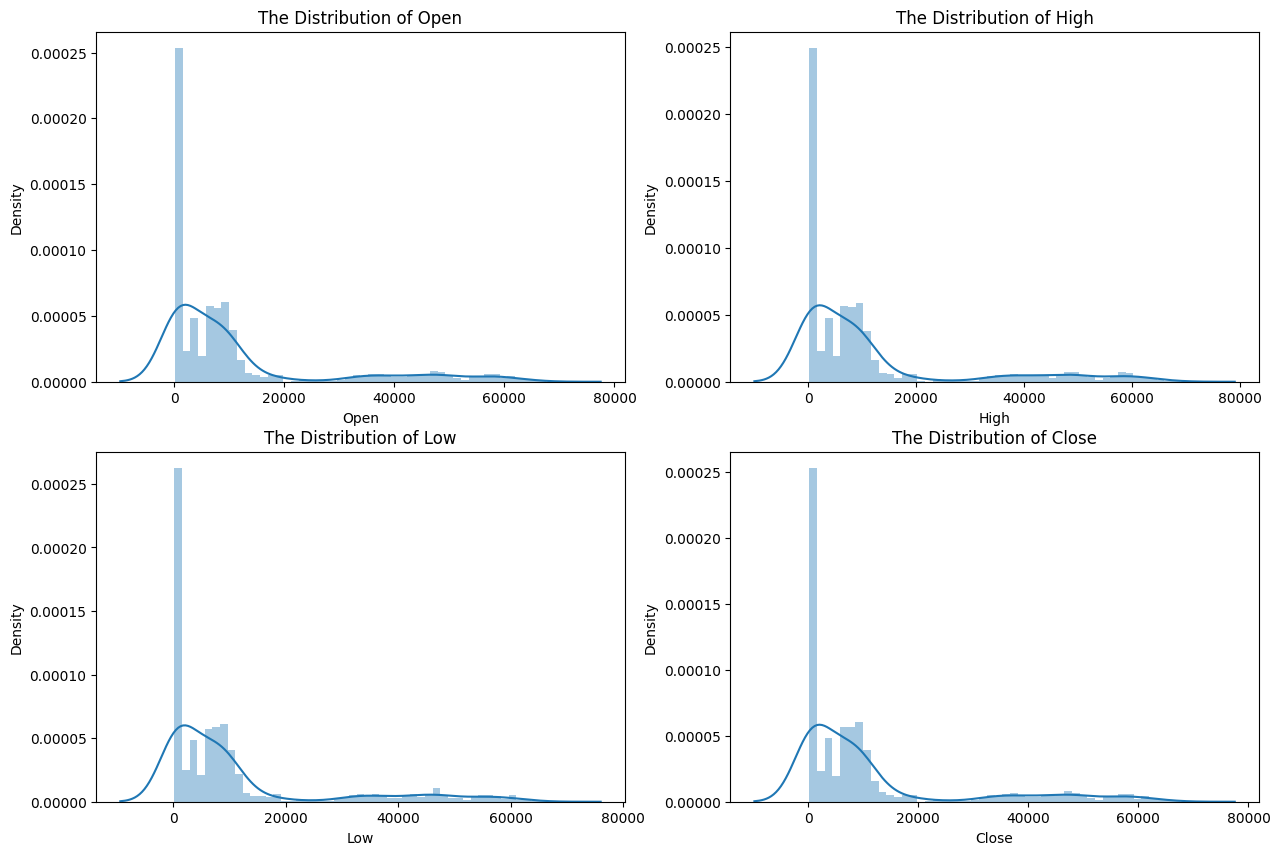

In [10]:
# distribution of the price measures
columns = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize = (15,10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[col])
    plt.title(f"The Distribution of {col}")
plt.show()

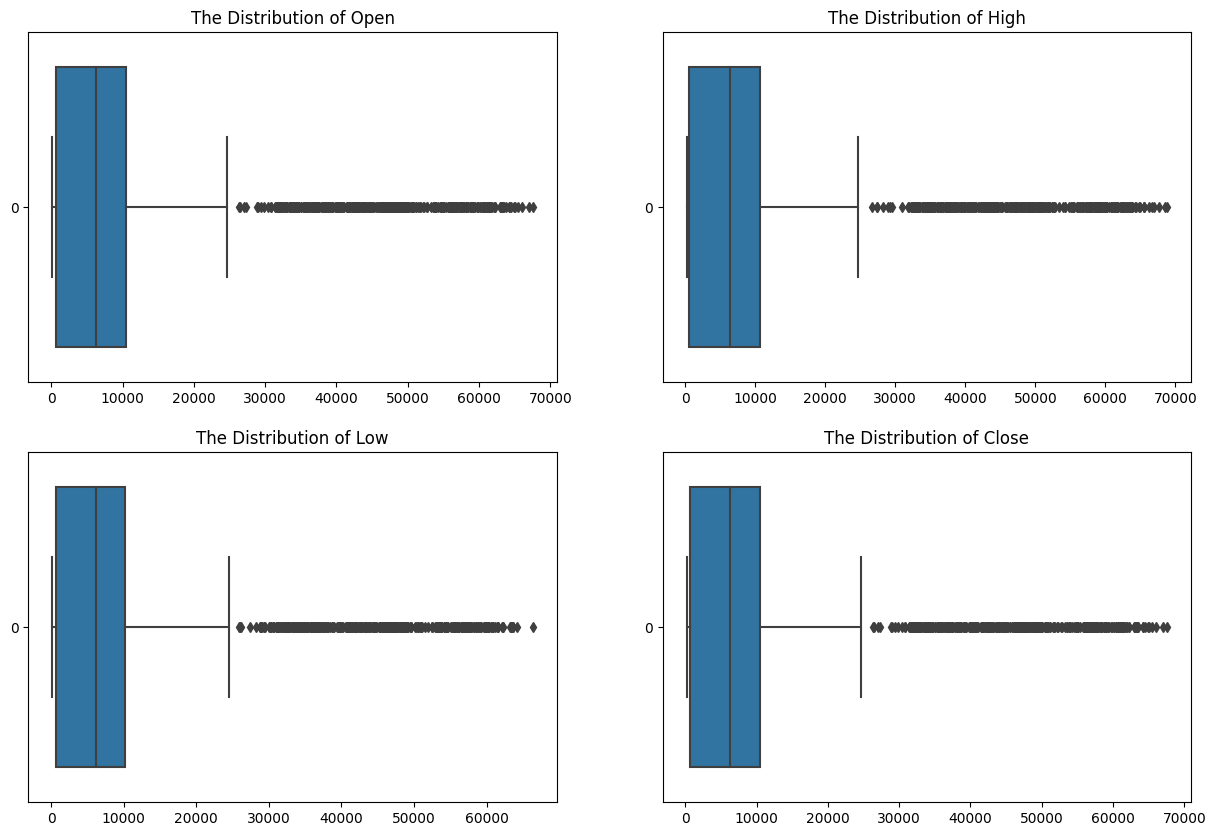

In [11]:
# boxplot of the price measures
columns = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize = (15,10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[col], orient="horiz")
    plt.title(f"The Distribution of {col}")
plt.show()

### Feature Engineering

In [12]:
# splitting the year month and day 
df["Year"] = df["Date"].apply(lambda x: int(x.split("-")[0]))
df["Month"] = df["Date"].apply(lambda x: int(x.split("-")[1]))
df["Day"] = df["Date"].apply(lambda x: int(x.split("-")[2]))
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


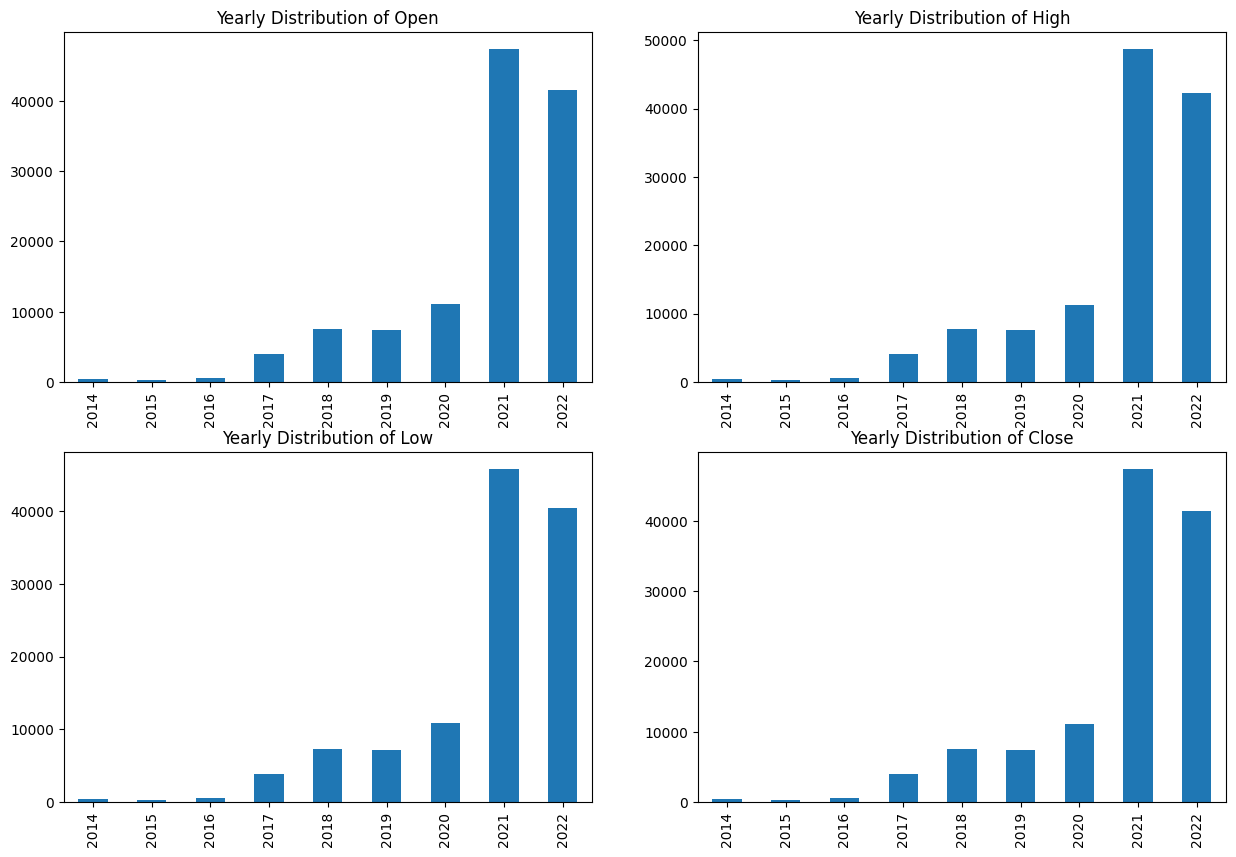

In [13]:
# plot of features on the yearly dataset
yearly_avg = df.groupby("Year")[columns].mean().reset_index()
plt.subplots(figsize = (15,10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    ax = yearly_avg[col].plot.bar()
    ax.set_xticklabels(list(yearly_avg["Year"]))
    ax.set_title(f"Yearly Distribution of {col}")
plt.show()

In [14]:
# adding more columns to extract additional information
df["is_quarter_end"] = df["Month"].apply(lambda x: 1 if x%3 == 0 else 0)
df["open-close"] = df["Open"] - df["Close"]
df["low-high"] = df["Low"] - df["High"]
df["Target"] = [1 if x else 0 for x in list(df["Close"].shift(-1) > df["Close"])]
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end,open-close,low-high,Target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


Text(0.5, 1.0, 'Pie chart of Target')

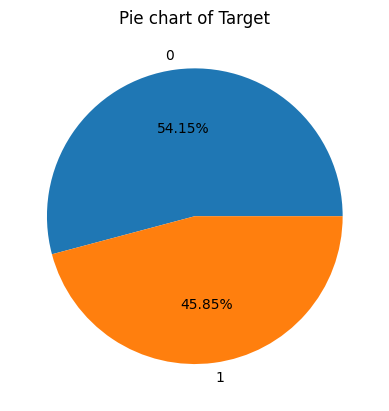

In [15]:
# display the proportion of time the increased in the next day
plt.pie(df["Target"].value_counts(), labels=["0", "1"], autopct="%1.2f%%")
plt.title("Pie chart of Target")

Text(0.5, 1.0, 'Correlation Structure of the variables')

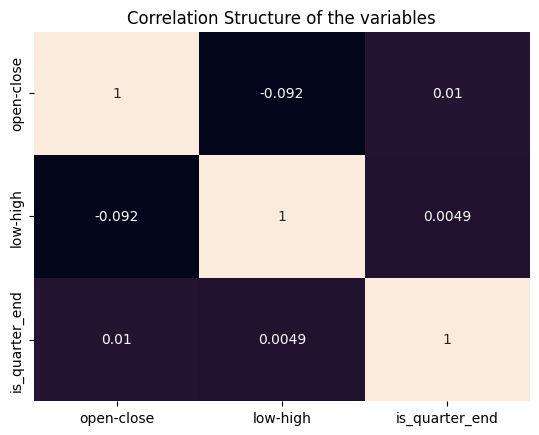

In [21]:
sns.heatmap(df[["open-close", "low-high", "is_quarter_end"]].corr(), annot=True, cbar=False)
plt.title("Correlation Structure of the variables")

### Model Training

In [22]:
# train-test split 
X_train, X_test, y_train, y_test = train_test_split(df[["open-close", "low-high", "is_quarter_end"]], df["Target"], test_size=0.1, random_state=101)

print(f'''X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}
''')

X_train: (2441, 3)
X_test: (272, 3)
y_train: (2441,)
y_test: (272,)



In [23]:
# scaling the dataset
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# logistic regression
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'''model: {models[i]}
    Training Accuracy: {roc_auc_score(y_train, models[i].predict_proba(X_train)[:, 1])}
    Testing Accuracy: {roc_auc_score(y_test, models[i].predict_proba(X_test)[:, 1])}''')

model: LogisticRegression()
    Training Accuracy: 0.5295409505644272
    Testing Accuracy: 0.47682550008131397
model: SVC(kernel='poly', probability=True)
    Training Accuracy: 0.5299802501200549
    Testing Accuracy: 0.4699951211579118
model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
  

Text(50.722222222222214, 0.5, 'Predicted Value')

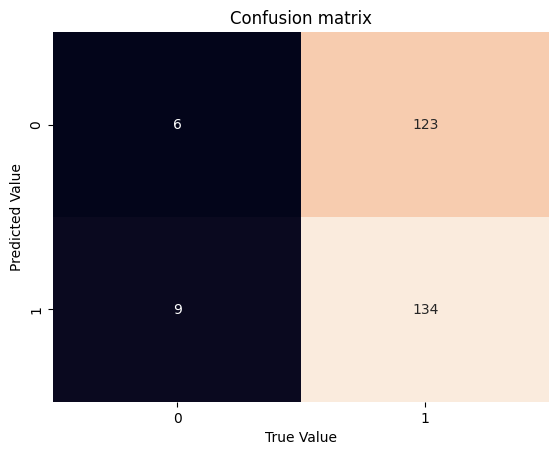

In [25]:
# confusion matrix for the logistic model
cm = confusion_matrix(y_test, models[0].predict(X_test))
sns.heatmap(cm, annot=True, fmt="g", cbar=False)
plt.title("Confusion matrix")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

In [109]:
# classification report
cr = classification_report(y_test, models[0].predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.05      0.08       129
           1       0.52      0.94      0.67       143

    accuracy                           0.51       272
   macro avg       0.46      0.49      0.38       272
weighted avg       0.46      0.51      0.39       272

